Notebook for Tweet Cleaning and Initial Exploration

In [1]:
# Installing packages
#!pip install wordcloud
#!pip install plotly
#!pip install contractions

In [2]:
# Import packages
import re
import string
import collections
import contractions
import ipywidgets
import nltk.tokenize
import emoji

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter

In [3]:
pd.set_option('display.max_colwidth', None)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Cleaning Dataset

In [4]:
# Import raw dataset
tweets_df = pd.read_csv('tweet')
tweets_df.head()

,Unnamed: 0,tweet_id,tweet_date,text
0,0,1641476680660254726,2023-03-30 16:25:12+00:00,"This is amazing. I've been pretty lucky in that my periods themselves are pretty average -- still painful, but not crippling. But what was crippling was my PMDD and the migraines that were tied to my cycle. To be able to just have that time would be invaluable."
1,1,1641473383291400208,2023-03-30 16:12:06+00:00,"@LadySnArkansas Some girls start their menstrual periods in third grade. Teachers must discuss with the girl, give reassurance, provide sanitary pads, etc. Teachers must cope with many situations. This is one."
2,2,1641473086661828609,2023-03-30 16:10:55+00:00,@KiraAfter_Dark @RebeccadeLuca8 @CDPROJEKTRED Nope completely wrong. My opinion is women do need their time of period off from work. In some RARE cases keyword is rare here don't let it go over your head. In some RARE cases a woman's menstrual cycle might be painfullyagonizing. But for the other 99 percent. Stop being soft
3,3,1641447805708546048,2023-03-30 14:30:28+00:00,Fluctuating hormone levels during your menstrual cycle can impact your complexion. Here are my #ProTips on caring for your skin during your period.\n\nhttps://t.co/ALEXR0HrUW
4,4,1641439775759667203,2023-03-30 13:58:33+00:00,Scented Sanitary Pads' are a big No-No. Swipe left to know why\n\n#sanitarypads #periods #menstruation #sanitarynapkins #period #menstruationmatters #menstrualhealth\n#Scentedpads https://t.co/SZyN5I95ca


In [5]:
def processed(text):    
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Expand contractions
    try:
        return contractions.fix(text)
    except:
        return text

In [6]:
tweets_df['processed_text'] = tweets_df['text'].apply(processed)
tweets_df.head()

,Unnamed: 0,tweet_id,tweet_date,text,processed_text
0,0,1641476680660254726,2023-03-30 16:25:12+00:00,"This is amazing. I've been pretty lucky in that my periods themselves are pretty average -- still painful, but not crippling. But what was crippling was my PMDD and the migraines that were tied to my cycle. To be able to just have that time would be invaluable.","this is amazing. i have been pretty lucky in that my periods themselves are pretty average -- still painful, but not crippling. but what was crippling was my pmdd and the migraines that were tied to my cycle. to be able to just have that time would be invaluable."
1,1,1641473383291400208,2023-03-30 16:12:06+00:00,"@LadySnArkansas Some girls start their menstrual periods in third grade. Teachers must discuss with the girl, give reassurance, provide sanitary pads, etc. Teachers must cope with many situations. This is one.","some girls start their menstrual periods in third grade. teachers must discuss with the girl, give reassurance, provide sanitary pads, etc. teachers must cope with many situations. this is one."
2,2,1641473086661828609,2023-03-30 16:10:55+00:00,@KiraAfter_Dark @RebeccadeLuca8 @CDPROJEKTRED Nope completely wrong. My opinion is women do need their time of period off from work. In some RARE cases keyword is rare here don't let it go over your head. In some RARE cases a woman's menstrual cycle might be painfullyagonizing. But for the other 99 percent. Stop being soft,nope completely wrong. my opinion is women do need their time of period off from work. in some rare cases keyword is rare here do not let it go over your head. in some rare cases a woman's menstrual cycle might be painfullyagonizing. but for the other 99 percent. stop being soft
3,3,1641447805708546048,2023-03-30 14:30:28+00:00,Fluctuating hormone levels during your menstrual cycle can impact your complexion. Here are my #ProTips on caring for your skin during your period.\n\nhttps://t.co/ALEXR0HrUW,fluctuating hormone levels during your menstrual cycle can impact your complexion. here are my on caring for your skin during your period.
4,4,1641439775759667203,2023-03-30 13:58:33+00:00,Scented Sanitary Pads' are a big No-No. Swipe left to know why\n\n#sanitarypads #periods #menstruation #sanitarynapkins #period #menstruationmatters #menstrualhealth\n#Scentedpads https://t.co/SZyN5I95ca,scented sanitary pads' are a big no-no. swipe left to know why


In [7]:
# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()
stopwords = set(STOPWORDS)

#  Strip punctuation, stopwords, numbers
def stripped(text):
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    # Drop punctuation
    text = re.sub('[' + punctuation + ']+', ' ', text)
    # Drop numbers
    text = re.sub(r'\d+', '', text)
    # Drop extra blank spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Drop words less than 3 characters and stopwords
    tokens = [word for word in text.split() if len(word) >= 3 and word not in stopwords]
    return " ".join(tokens)

tweets_df['stripped_text'] = tweets_df['processed_text'].apply(stripped)

# Lemmatize stripped text
tweets_df['text_lem'] = tweets_df['stripped_text'].apply(wordnet_lem.lemmatize)

In [8]:
tweets_df['text_tokens'] = tweets_df['text_lem'].apply(word_tokenize)
tweets_df.head()

,Unnamed: 0,tweet_id,tweet_date,text,processed_text,stripped_text,text_lem,text_tokens
0,0,1641476680660254726,2023-03-30 16:25:12+00:00,"This is amazing. I've been pretty lucky in that my periods themselves are pretty average -- still painful, but not crippling. But what was crippling was my PMDD and the migraines that were tied to my cycle. To be able to just have that time would be invaluable.","this is amazing. i have been pretty lucky in that my periods themselves are pretty average -- still painful, but not crippling. but what was crippling was my pmdd and the migraines that were tied to my cycle. to be able to just have that time would be invaluable.",amazing pretty lucky periods pretty average still painful crippling crippling pmdd migraines tied cycle able time invaluable,amazing pretty lucky periods pretty average still painful crippling crippling pmdd migraines tied cycle able time invaluable,"[amazing, pretty, lucky, periods, pretty, average, still, painful, crippling, crippling, pmdd, migraines, tied, cycle, able, time, invaluable]"
1,1,1641473383291400208,2023-03-30 16:12:06+00:00,"@LadySnArkansas Some girls start their menstrual periods in third grade. Teachers must discuss with the girl, give reassurance, provide sanitary pads, etc. Teachers must cope with many situations. This is one.","some girls start their menstrual periods in third grade. teachers must discuss with the girl, give reassurance, provide sanitary pads, etc. teachers must cope with many situations. this is one.",girls start menstrual periods third grade teachers must discuss girl give reassurance provide sanitary pads etc teachers must cope many situations one,girls start menstrual periods third grade teachers must discuss girl give reassurance provide sanitary pads etc teachers must cope many situations one,"[girls, start, menstrual, periods, third, grade, teachers, must, discuss, girl, give, reassurance, provide, sanitary, pads, etc, teachers, must, cope, many, situations, one]"
2,2,1641473086661828609,2023-03-30 16:10:55+00:00,@KiraAfter_Dark @RebeccadeLuca8 @CDPROJEKTRED Nope completely wrong. My opinion is women do need their time of period off from work. In some RARE cases keyword is rare here don't let it go over your head. In some RARE cases a woman's menstrual cycle might be painfullyagonizing. But for the other 99 percent. Stop being soft,nope completely wrong. my opinion is women do need their time of period off from work. in some rare cases keyword is rare here do not let it go over your head. in some rare cases a woman's menstrual cycle might be painfullyagonizing. but for the other 99 percent. stop being soft,nope completely wrong opinion women need time period work rare cases keyword rare let head rare cases woman menstrual cycle might painfullyagonizing percent stop soft,nope completely wrong opinion women need time period work rare cases keyword rare let head rare cases woman menstrual cycle might painfullyagonizing percent stop soft,"[nope, completely, wrong, opinion, women, need, time, period, work, rare, cases, keyword, rare, let, head, rare, cases, woman, menstrual, cycle, might, painfullyagonizing, percent, stop, soft]"
3,3,1641447805708546048,2023-03-30 14:30:28+00:00,Fluctuating hormone levels during your menstrual cycle can impact your complexion. Here are my #ProTips on caring for your skin during your period.\n\nhttps://t.co/ALEXR0HrUW,fluctuating hormone levels during your menstrual cycle can impact your complexion. here are my on caring for your skin during your period.,fluctuating hormone levels menstrual cycle impact complexion caring skin period,fluctuating hormone levels menstrual cycle impact complexion caring skin period,"[fluctuating, hormone, levels, menstrual, cycle, impact, complexion, caring, skin, period]"
4,4,1641439775759667203,2023-03-30 13:58:33+00:00,Scented Sanitary Pads' are a big No-No. Swipe left to know why\n\n#sanitarypads #periods #menstruation #sanitarynapkins #period #menstruationmatters #m

Hashtags

In [9]:
# Create list of all hashtags in dataset
hashtags_list = []

for tweet in tweets_df['text']:
    # Extract hashtags from tweet content
    hashtags_temp = [hashtag.lower() for hashtag in re.findall(r'#\w+', tweet)]
    # Append hashtags to list
    hashtags_list.extend(hashtags_temp)

# Count frequency of each hashtag
hashtags_count = Counter(hashtags_list)

# Print the top 20 most common hashtags
top_n = 20
for hashtag, count in hashtags_count.most_common(top_n):
    print(f"{hashtag:<20} {count:<10}")

#menstruation        579       
#periods             505       
#period              380       
#women               203       
#teamfreesanitarypads 195       
#periodpoverty       178       
#sanitarypads        153       
#pads                138       
#endperiodpoverty    136       
#womenshealth        133       
#cycle               122       
#menstruationmatters 121       
#menstrual           118       
#sanitary            104       
#menstrualhygieneday 88        
#girl                87        
#problemsolving      80        
#explorepage         80        
#endperiodshaming    79        
#menstrualhygiene    73        


Mentions

In [10]:
# Create list of all hashtags in dataset
mentions_list = []

for tweet in tweets_df['text']:
    # Extract hashtags from tweet content
    mentions_temp = [mention.lower() for mention in re.findall(r'@\w+', tweet)]
    # Append hashtags to list
    mentions_list.extend(mentions_temp)

# Count frequency of each hashtag
mentions_count = Counter(mentions_list)

# Print the top 20 most common hashtags
top_n = 20
for mentions, count in mentions_count.most_common(top_n):
    print(f"{mentions:<20} {count:<10}")

@gloria_orwoba       111       
@un_women            25        
@heygirlsuk          25        
@mhday28may          19        
@youtube             19        
@tradetoaidorg       19        
@sotonbloggers       19        
@borobloggers        19        
@sincerelyessie      19        
@period_poverty      19        
@free_sanitary_p     16        
@drjengunter         15        
@akshaykumar         15        
@cdhosabarkantha     14        
@djtira              14        
@unicef              13        
@always              13        
@nankunda20          12        
@monicalennon7       12        
@clue                11        


Unigrams (incl. worldcloud w/wo keywords)

In [11]:
# Creating basic wordcloud without a shape mask
#stopwords = set(STOPWORDS)

#wordcloud_twitter = WordCloud(background_color = 'white', 
#                              mode="RGBA", 
#                              stopwords=stopwords).generate(all_words_lem)
# Display the generated Word Cloud
#plt.imshow(wordcloud_twitter, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [12]:
# Making brand logo maskable if not already
#mask = np.array(Image.open("lymlogo.png"))

#def transform_zeros(val):
#    if val == 0:
#        return 255
#    else:
#        return val
    
#maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

#for i in range(len(mask)):
#    maskable_image[i] = list(map(transform_zeros, mask[i]))
    
#mask = maskable_image

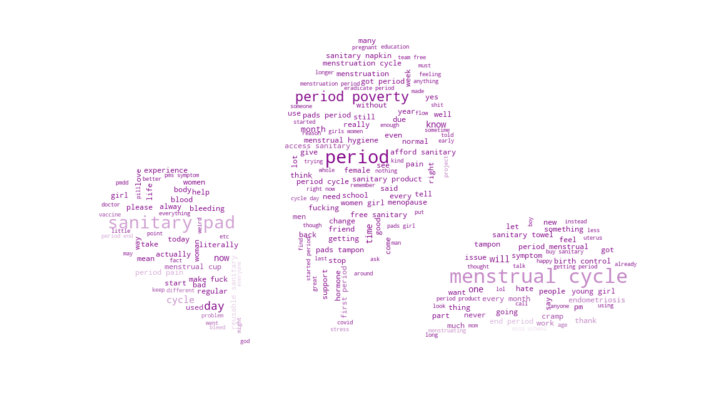

In [13]:
# Generate a word cloud image with mask

# Join all lemmatized words in a list
all_words_lem = ' '.join([word for word in tweets_df['text_lem']])

mask = np.array(Image.open("lymlogo2.png"))

stopwords = set(STOPWORDS)

wordcloud_twitter1 = WordCloud(height=400,
                              width=800,
                              background_color="white", 
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(all_words_lem)

# Display the generated Word Cloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_twitter1.recolor(color_func=image_colors), interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [14]:
# Generate a word cloud image with mask excluding keywords

# List of keywords to remove
# *Need to edit this code, the drop function doesn't work all the way throughout
#keywords_drop = ['period','cycle','sanitary', 'pads', 'cramps', 'cycle', 'bleed', 'bleeding','poverty', 'menstruate','menstruation','menstrual','menses', 'menstruates', 'menstruated', 'menstruating', 'menstruous','premenstrual','postmenstrual', 'menopause','PMS', 'PMDD', 'endometriosis', 'fibroids', 'tampon', 'tampons']

# Remove all the words in the list of keywords
#processed_words_lem = ""
#for word in all_words_lem.split():
#    if word not in keywords_drop:
#        processed_words_lem += word + " "

#processed_words_lem = processed_words_lem.strip()

#wordcloud_twitter2 = WordCloud(height=400,
#                              width=800,
#                              background_color="white", 
#                              mode="RGBA",
#                              stopwords=stopwords,
#                              mask=mask).generate(processed_words_lem)

# Display the generated Word Cloud
#image_colors = ImageColorGenerator(mask)
#plt.figure(figsize=[10,10])
#plt.imshow(wordcloud_twitter1.recolor(color_func=image_colors), interpolation='bilinear')
#plt.tight_layout(pad=0)
#plt.axis("off")
#plt.show()

Bi-grams

In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams_list = get_top_n_bigram(tweets_df['processed_text'], 20)
bigrams_list = bigrams_list[1:]

for word, freq in bigrams_list:
    print(word, freq)

sanitary pads 4319
period poverty 2637
sanitary products 683
free sanitary 571
menstrual hygiene 528
end period 525
cycle period 459
reusable sanitary 395
pads tampons 374
period menstrual 350
got period 299
menstrual cups 297
menstrual period 294
birth control 292
period cycle 260
young girls 255
women girls 254
menstruation cycle 243
afford sanitary 239


In [16]:
# Top bigrams excluding keywords
# bigrams_list2 = get_top_n_bigram(tweets_df['processed_text'], 50)
# bigrams_list2 = bigrams_list2[1:]

# to_drop = ['period cycle','sanitary pads', 'my period', 'your period', 'period cramps', 'period cycle', 'period bleed', 'period bleeding','period poverty''menstruate','menstruation','menstrual','menses', 'menstruates', 'menstruated', 'menstruating', 'menstruous','premenstrual','postmenstrual', 'menopause','PMS', 'PMDD', 'endometriosis', 'fibroids', 'tampon', 'tampons']


#for word, freq in bigrams_list2:
#    print(word, freq)

Tri-grams

In [17]:
# Top trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

trigrams_list = get_top_n_trigram(tweets_df['processed_text'], 20)

for word, freq in trigrams_list:
    print(word, freq)

end period poverty 487
free sanitary pads 441
reusable sanitary pads 351
menstrual cycle period 338
period menstrual cycle 317
afford sanitary pads 176
team free sanitary 175
sanitary pads tampons 167
access sanitary pads 164
eradicate period poverty 143
sanitary pads girls 139
sanitary pads menstrual 129
buy sanitary pads 125
ending period poverty 114
menstrual cycle just 113
sanitary pads period 113
tackle period poverty 112
fight period poverty 111
tampons sanitary pads 109
periods menstrual cycle 108


In [18]:
# Export pre-processed data for analysis
tweets_df.to_csv("tweet_processed")